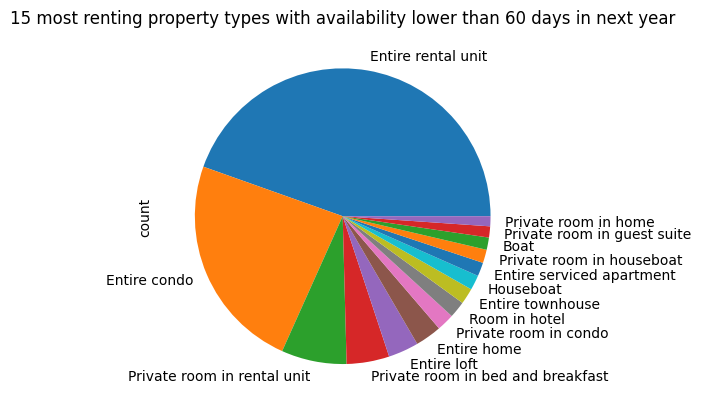

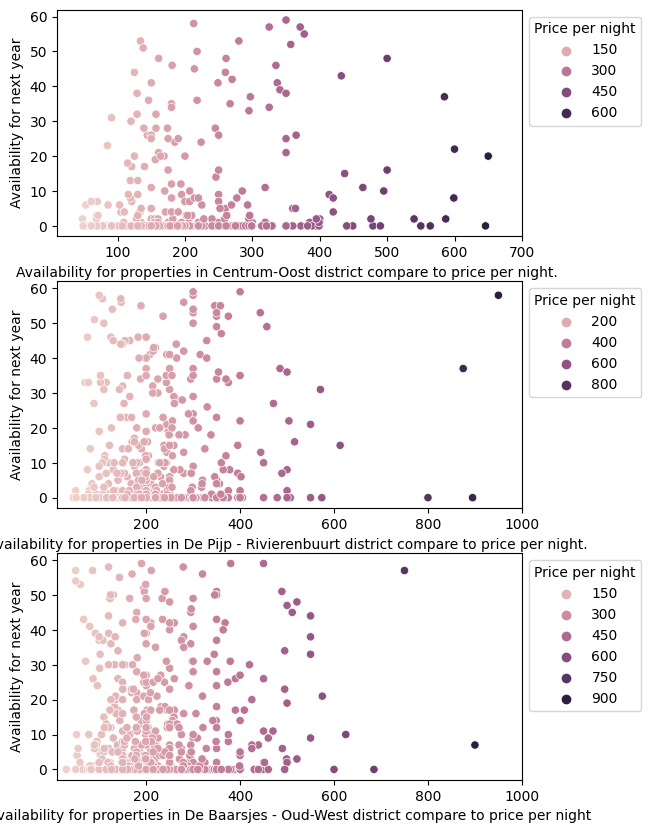

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('listings_am.csv')
df2 = pd.read_csv('listings_ant.csv')
df['price_usd']=df.price.str.replace('[\$\,\.]', '', regex=True).astype(int)/100
grouped_neighbourhoods=df.loc[df['neighbourhood_cleansed'].isin(['Centrum-Oost','De Pijp - Rivierenbuurt','De Baarsjes - Oud-West'])]
used_columns=grouped_neighbourhoods[['neighbourhood_cleansed','listing_url','property_type','price_usd','availability_365','has_availability']]
availabilty=used_columns[(used_columns['availability_365']<60) & (used_columns['price_usd']>0)&(used_columns['has_availability']=='t')]
Centrum=availabilty[availabilty['neighbourhood_cleansed'] =='Centrum-Oost']
Pijp=availabilty[availabilty['neighbourhood_cleansed'] =='De Pijp - Rivierenbuurt']
Baarsjes=availabilty[availabilty['neighbourhood_cleansed'] =='De Baarsjes - Oud-West']
best_type=used_columns["property_type"].value_counts()
pplot=best_type.head(15).plot(kind='pie')
pplot.set_title("15 most renting property types with availability lower than 60 days in next year")
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, sharey=True, figsize=(6,10))
sns.scatterplot(x='price_usd', y='availability_365', data=Centrum, hue='price_usd',ax=ax0)
ax0.set(xlabel="Availability for properties in Centrum-Oost district compare to price per night. ", xlim=(10,700), ylabel="Availability for next year")
sns.scatterplot(x='price_usd', y='availability_365', data=Pijp, hue='price_usd',ax=ax1)
ax1.set(xlabel="Availability for properties in De Pijp - Rivierenbuurt district compare to price per night. ", xlim=(10,1000), ylabel="Availability for next year")
sns.scatterplot(x='price_usd', y='availability_365', data=Baarsjes, hue='price_usd',ax=ax2)
ax2.set(xlabel="Availability for properties in De Baarsjes - Oud-West district compare to price per night", xlim=(10,1000), ylabel="Availability for next year")
ax0.legend(title='Price per night')
ax1.legend(title='Price per night')
ax2.legend(title='Price per night')
sns.move_legend(ax0, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
plt.show()

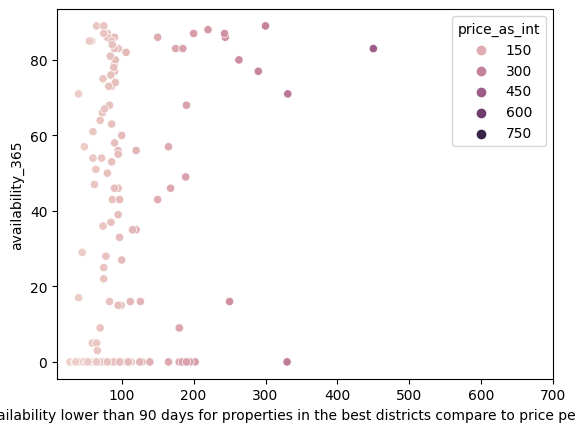

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df2 = pd.read_csv('listings_ant.csv')
df2['price_as_int']=df2.price.str.replace('[\$\,\.]', '', regex=True).astype(int)/100
grouped_neighbourhoods=df2.loc[df2['neighbourhood_cleansed'].isin(['Historisch Centrum','Eilandje','Oud - Berchem','Zuid'])]
used_columns=grouped_neighbourhoods[['neighbourhood_cleansed','listing_url','property_type','price_as_int','availability_365','has_availability']]
graph_data=used_columns[(used_columns['availability_365']<90) & (used_columns['price_as_int']>0)&(used_columns['has_availability']=='t')]
g=sns.scatterplot(x='price_as_int', y='availability_365', data=graph_data, hue='price_as_int')
g.set(xlabel="Availability lower than 90 days for properties in the best districts compare to price per night. ", xlim=(10,700))
plt.show()